In [442]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Importing dataset and performing basic manipulations

In [291]:
data=pd.read_csv('historical_credit_gap_dataset.csv')

In [292]:
data=pd.DataFrame(data[data["Borrowers' country"].str.contains('IN')].iloc[2][7:]).dropna().reset_index()

In [293]:
data.columns=['quarter','credit']

In [333]:
data['quarter']=pd.to_datetime(data.quarter)
data['credit']=data.credit.astype('float')

In [334]:
data.head(20)

,quarter,credit
0,1961-04-01,-1.3
1,1961-07-01,-1.9
2,1961-10-01,-1.5
3,1962-01-01,-0.5
4,1962-04-01,-0.3
5,1962-07-01,-1.0
6,1962-10-01,-1.0
7,1963-01-01,-0.9
8,1963-04-01,-1.0
9,1963-07-01,-1.7


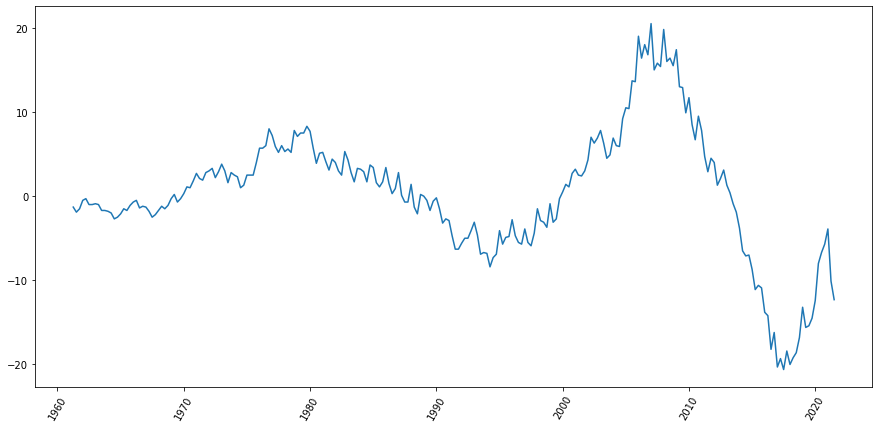

In [335]:
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(data.quarter,data.credit)
plt.xticks(rotation=60)
plt.show()

# 

# 

# 

# 

# STATIONARITY 

Augmented Dickey-Fuller Test -
   H0: Non stationary    

In [631]:
adfuller(data.credit)[1]

0.03432980639291391

# p=0.03<0.05.  Reject H0, therefore time series is stationary

To find order of differencing to make time series stationary:

In [622]:
ndiffs(data.credit, test="adf")

1


# ORDER OF DIFF d=1

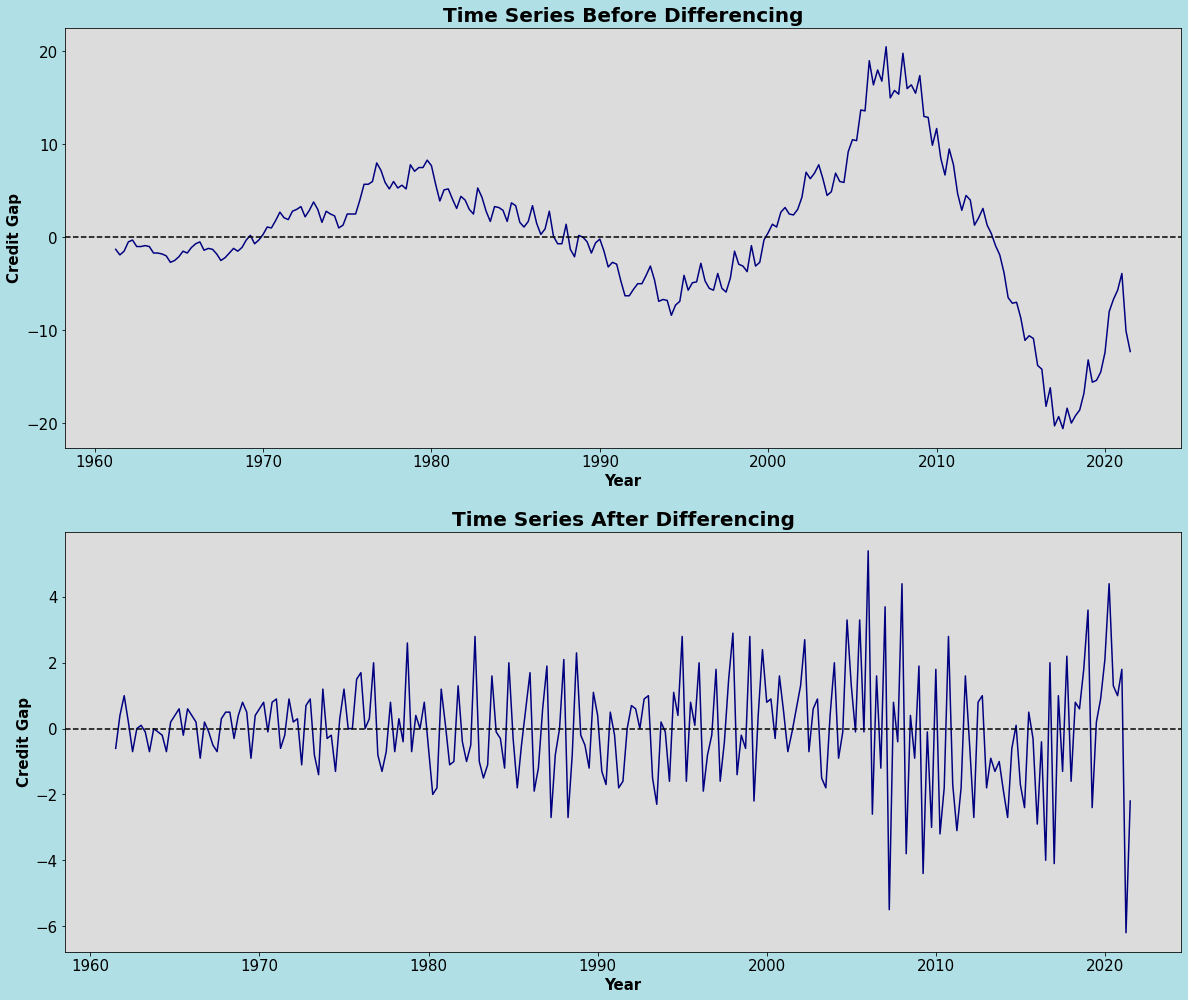

In [692]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(20,17))
ax1.plot(data.quarter, data.credit, color='navy')
ax2.plot(data.quarter, data.credit.diff(), color='navy')
fig.set_facecolor("powderblue")
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.set_facecolor("gainsboro")
ax2.set_facecolor("gainsboro")
ax1.set_xlabel('Year', fontsize=15, fontweight='bold')
ax2.set_xlabel('Year', fontsize=15, fontweight='bold')
ax1.set_ylabel('Credit Gap', fontsize=15, fontweight='bold')
ax2.set_ylabel('Credit Gap', fontsize=15, fontweight='bold')
ax1.set_title('Time Series Before Differencing', fontsize=20, fontweight='extra bold')
ax2.set_title('Time Series After Differencing', fontsize=20, fontweight='extra bold')
ax1.axhline(y=0, color='k', linestyle='--')
ax2.axhline(y=0, color='k', linestyle='--')
plt.show()

# TRAIN TEST SPLIT:

In [432]:
train=data.credit.head(math.ceil(len(data.credit)*0.85))
test=data.drop(train.index).credit

# AR TERM p:

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 0, 'LAG')

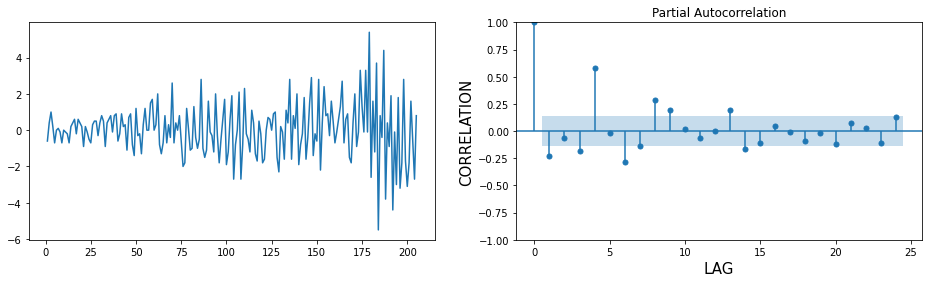

In [433]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(train.diff().dropna())
plot_pacf(train.diff().dropna(), ax=ax2);
ax2.set_ylabel('CORRELATION', fontdict={'fontsize':15})
ax2.set_xlabel('LAG', fontdict={'fontsize':15})

# 

# 

# MA TERM q:

Text(0.5, 0, 'YEAR')

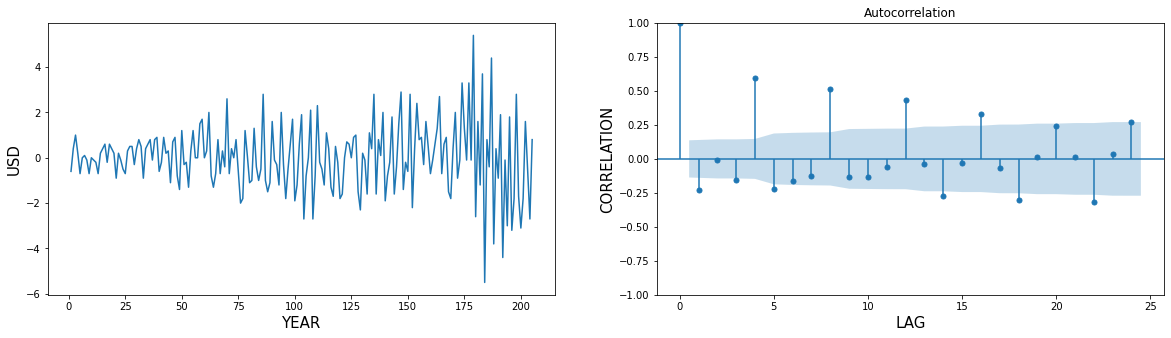

In [434]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(train.diff().dropna())
plot_acf(train.diff().dropna(), ax=ax2);
ax2.set_ylabel('CORRELATION', fontdict={'fontsize':15})
ax2.set_xlabel('LAG', fontdict={'fontsize':15})
ax1.set_ylabel('USD', fontdict={'fontsize':15})
ax1.set_xlabel('YEAR', fontdict={'fontsize':15})

# 

# 

# RUNNING PMDAUTOARIMA:

In [830]:
stepwise_fit = auto_arima(train, trace=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=627.708, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=750.100, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=659.108, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=693.740, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=748.126, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=693.514, Time=0.98 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=644.546, Time=1.16 sec
 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=626.710, Time=2.57 sec
 ARIMA(2,1,2)(2,0,0)[4] intercept   : AIC=633.038, Time=1.17 sec
 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=629.402, Time=2.88 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=628.308, Time=1.88 sec
 ARIMA(1,1,2)(2,0,1)[4] intercept   : AIC=626.609, Time=1.74 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=626.122, Time=0.72 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=691.962, Time=0.71 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=654.3

In [831]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  206
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 4)   Log Likelihood                -306.447
Date:                             Tue, 01 Mar 2022   AIC                            622.894
Time:                                     20:09:08   BIC                            639.509
Sample:                                          0   HQIC                           629.614
                                             - 206                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2027      0.069     -2.941      0.003      -0.338      -0.068
ma.L2          0.3562      0.060      5.901      0.000       0.238       0.475
ar.S.L4        0.9546      0.026     36.535      0.000       0.903       1.006
ma.S.L4       -0.5883      0.066     -8.951      0.000      -0.717      -0.460
sigma2         1.1363      0.094     12.142      0.000       0.953       1.320
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                31.81
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 

# ############################################################# 

# FITTING THE MODEL:

In [510]:
model=ARIMA(train, order=(0,1,2), seasonal_order=(1,0,1,4)).fit()

# Without each step

In [479]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            credit   No. Observations:                  206
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 4)   Log Likelihood                -306.447
Date:                           Tue, 01 Mar 2022   AIC                            622.894
Time:                                   13:06:05   BIC                            639.509
Sample:                                        0   HQIC                           629.614
                                           - 206                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2027      0.069     -2.941      0.003      -0.338      -0.068
ma.L2          0.3562      0.060      5.901      0.000       0.238       0.475
ar.S.L4        0.9546      0.026     36.535      0.000       0.903       1.006
ma.S.L4       -0.5883      0.066     -8.951      0.000      -0.717      -0.460
sigma2         1.1363      0.094     12.142      0.000       0.953       1.320
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                31.81
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [438]:
pred=model.predict(start=len(train), end=len(data)-1)

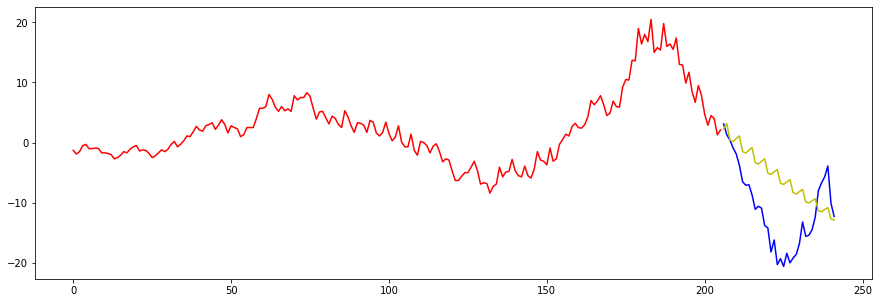

In [439]:
fig, ax=plt.subplots(figsize=(15,5))

ax.plot(train, color='r')
ax.plot(test, color='b')
ax.plot(pred, color='y')

In [444]:
np.sqrt(mean_squared_error(test,pred))

8.024615558352847

In [450]:
np.mean(np.abs(test))

11.297222222222222

# ########################################################## 

# 

# With Each step:

In [834]:
def forecast_one_step():
    fc, conf_int = stepwise_fit.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts_learn = []
confidence_intervals = []

for new_ob in test:
    fc,conf= forecast_one_step()
    forecasts_learn.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    stepwise_fit.update(new_ob)

In [835]:
forecasts_learn=pd.Series(forecasts_learn)

In [836]:
forecasts_learn.index=test.index

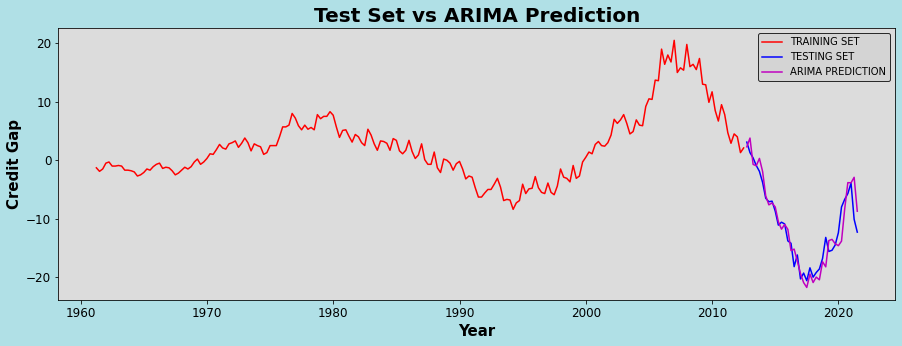

In [837]:
fig, ax=plt.subplots(figsize=(15,5))



ax.plot(pd.Series(train).set_axis(data.head(math.ceil(len(data.credit)*0.85)).quarter), color='r', label='TRAINING SET')
ax.plot(pd.Series(test).set_axis(data.drop(train.index).quarter), color='b',label='TESTING SET')
ax.plot(pd.Series(forecasts_learn).set_axis(data.drop(train.index).quarter), color='m',label='ARIMA PREDICTION')
fig.set_facecolor('powderblue')
ax.set_facecolor('gainsboro')
ax.set_xlabel('Year', fontsize=15 ,fontweight='bold')
ax.set_ylabel('Credit Gap', fontsize=15,  fontweight='bold')
ax.set_title('Test Set vs ARIMA Prediction', fontsize=20, fontweight='bold')
ax.tick_params(labelsize=12)
ax.legend(loc='upper right', facecolor='lightgray', edgecolor='k')

In [601]:
np.sqrt(mean_squared_error(test,forecasts))

2.28456907665649

In [602]:
np.sqrt(np.var(test))

6.626077247614762

In [603]:
np.mean(np.abs(test))

11.297222222222222

# RMSE is within 1 SD of the testing data. Additionally, RMSE = 2 with mean of  data as 11. Hence, this variation is acceptable. 

# 

# 

# 

# 

# 

# ############################################################## 

# FINAL MODEL PREDICTION:

In [452]:
final_model=ARIMA(data.credit, order=(0,1,2), seasonal_order=(1,0,1,4)).fit()

In [474]:
prediction=final_model.predict(len(data), len(data)+5)

In [475]:
prediction

242   -13.305792
243   -13.395313
244   -14.915437
245   -15.494937
246   -15.285824
247   -14.691398
Name: predicted_mean, dtype: float64

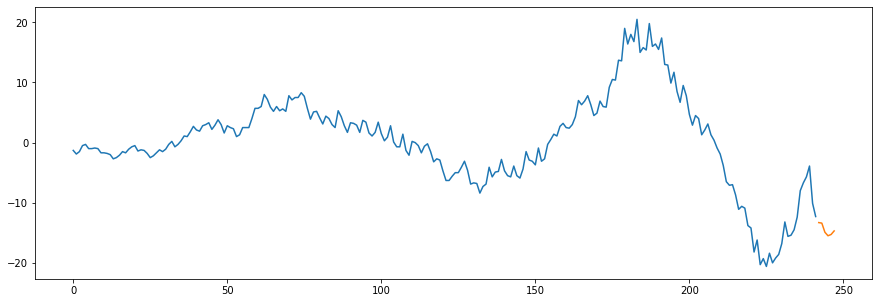

In [476]:
fig, ax=plt.subplots(figsize=(15,5))
ax.plot(data.credit)
ax.plot(prediction)

# ############################################################## 

# 

# 

# FINAL MODEL WITH EACH STEP:

In [838]:
final_model_2=auto_arima(data.credit, d=1, start_p=0,max_p=0, start_q=2, max_q=2, m=4)

In [839]:
final_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  242
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 4)   Log Likelihood                -408.000
Date:                             Tue, 01 Mar 2022   AIC                            826.000
Time:                                     20:09:55   BIC                            843.424
Sample:                                          0   HQIC                           833.019
                                             - 242                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1042      0.049     -2.146      0.032      -0.199      -0.009
ma.L2          0.3508      0.065      5.401      0.000       0.224       0.478
ar.S.L4        0.9242      0.029     31.562      0.000       0.867       0.982
ma.S.L4       -0.5810      0.058     -9.942      0.000      -0.696      -0.466
sigma2         1.7064      0.116     14.659      0.000       1.478       1.935
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               171.93
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               8.11   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##  5 Quarter Forecast:

In [842]:
def forecast_one_step_final():
    fc, conf_int = final_model_2.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in range(0,5):
    fc,conf= forecast_one_step_final()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    final_model_2.update(new_ob)

In [843]:
forecasts=pd.Series(forecasts)

In [844]:
forecasts.index=list(range(data.index[-1]+1,data.index[-1]+new_ob+2))

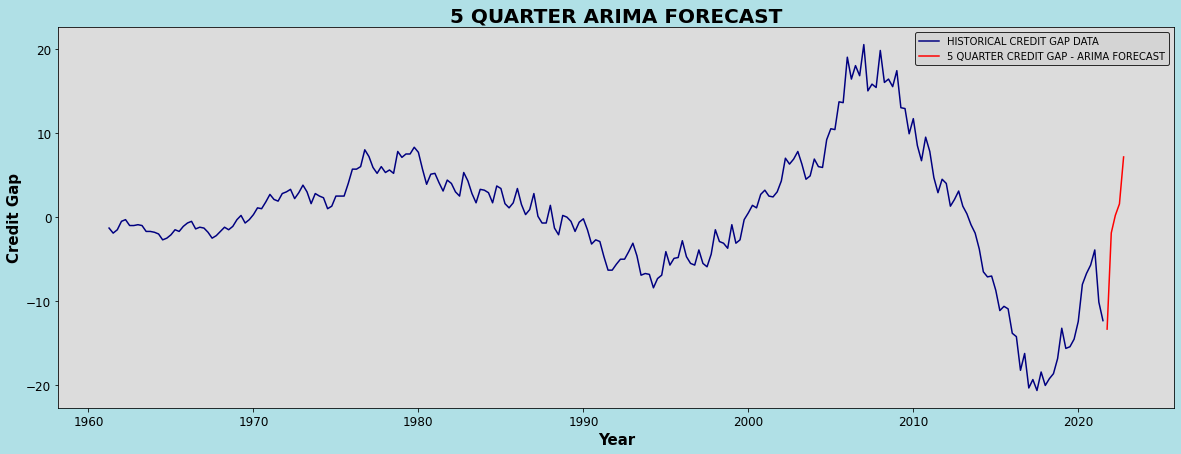

In [845]:
fig, ax=plt.subplots(figsize=(20,7))
ax.plot(pd.Series(data.credit).set_axis(data.quarter), color='navy', label='HISTORICAL CREDIT GAP DATA')
ax.plot(pd.Series(forecasts).set_axis(pd.date_range(start=data.quarter.iloc[-1] + pd.DateOffset(months=3),periods=5, freq='QS')), color='r', label='5 QUARTER CREDIT GAP - ARIMA FORECAST')

fig.set_facecolor('powderblue')
ax.set_facecolor('gainsboro')
ax.set_xlabel('Year', fontsize=15 ,fontweight='bold')
ax.set_ylabel('Credit Gap', fontsize=15,  fontweight='bold')
ax.set_title('5 QUARTER ARIMA FORECAST', fontsize=20, fontweight='bold')
ax.tick_params(labelsize=12)
ax.legend(loc='upper right', facecolor='lightgray', edgecolor='k')
plt.show()

In [796]:
forecasts

242   -13.305792
243    -1.879890
244     0.209148
245     1.569346
246     7.150759
dtype: float64